In [120]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio


In [121]:
data = sio.loadmat('MRI')

In [122]:
X1 = data['X1']
X2 = data['X2']
X3 = data['X3']

In [123]:
y1 = data['y1']
y2 = data['y2']
y3 = data['y3']

In [124]:
rho = 0.5
lambda_ = 1
B = 3

In [125]:
beta_1 = np.dot(A,b)
beta_1.shape

(961, 1)

In [126]:
def  beta_calculation(X1, y1,the,  u):
    Xtx = np.dot(X1.T, X1)
    I = np.identity(X1.shape[1])
    A = np.linalg.inv((Xtx + rho*I))
    b = np.dot(X1.T, y1) + rho*(the-u)
    beta_1 = np.dot(A,b)
    return beta_1
    
    

In [127]:
## Initializing u and theta
u1 = np.random.uniform(low = -100, high = 100, size =[961,1])
u2 = np.random.uniform(low = -100, high = 100, size =[961,1])
u3 = np.random.uniform(low = -100, high = 100, size =[961,1])
theta = np.random.uniform(low = -100, high = 100, size =[961,1])
I = np.identity(X1.shape[1])
X = [X1, X2, X3]


In [ ]:
for i in range(0,2000):
    beta_1 = beta_calculation(X1,y1,theta,u1)
    beta_2 = beta_calculation(X2,y2,theta,u2)
    beta_3 = beta_calculation(X3,y3,theta,u3)
    beta = np.hstack([beta_1, beta_2, beta_3])
    u = np.hstack([u1, u2, u3])
    beta_mean = np.mean(beta, axis =1).reshape([961,1])
    u_mean = np.mean(u, axis = 1).reshape([961,1])
    beta_u = beta_mean +u_mean
    if beta_u.all() > (rho/(lambda_*B)):
        theta = beta_u -(rho/(lambda_*B))
    elif (beta_u.all() < - (rho/(lambda_*B))):
        theta = beta_u + (rho/(lambda_*B))
    else:
        theta = 0
        
    u1 = u1 + beta_1 - theta
    u2 = u2 +beta_2 -theta
    u3 = u3 +beta_3 -theta
        

In [ ]:
theta.shape

In [98]:
image = sio.loadmat('img.pb3')

In [100]:
img = image['img']

In [102]:
img.shape

(31, 31)

In [103]:
reconstructed_img = theta.reshape([31,31])

In [119]:
arr = reconstructed_img

array([[-1.23848671e+02, -5.73226554e+01, -1.84489769e+02,
        -2.03400420e+01, -7.22527260e+01, -1.69455978e+02,
        -2.76308843e+02, -1.60513455e+02, -1.12203084e+02,
        -6.31732083e+01, -1.93668088e+02, -5.41485015e+01,
         2.73771183e+01, -6.00419628e+01,  6.69951047e+01,
        -1.20248865e+02, -1.97531421e+02,  2.03343275e+01,
        -4.21730682e+01,  1.54667510e+01, -1.32601864e+02,
        -7.32827823e+01, -1.08994682e+02, -1.54507572e+02,
        -2.01925913e+02, -1.00751596e+02, -1.26884344e+02,
        -1.64628501e+02, -1.37334676e+02, -1.83648236e+02,
         8.86708952e+01],
       [ 8.72992182e+01,  2.97619360e+01, -2.74317990e+02,
        -2.28957280e+02,  2.07838156e+01, -9.57517627e+01,
        -1.25402333e+02, -1.17608592e+02,  1.60521388e+02,
        -4.01105923e+01,  4.51989828e+01, -2.96685555e+02,
        -1.14884190e-01, -2.44221698e+02, -1.12764017e+02,
        -5.79674061e+01,  8.15253034e+01, -6.52385296e+01,
         4.22980810e+00, -4.70

In [116]:
new_arr = ((arr - arr.min()) * (1/(arr.max() - arr.min()) * 255).astype('uint8'))


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0

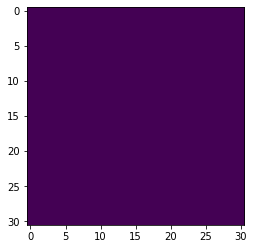

In [118]:
plt.imshow(new_arr)

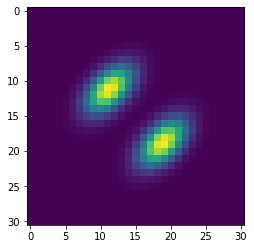

In [112]:
plt.imshow(img)